# <center> Magic Arena Economy Analysis </center>

In [216]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
# from IPython.display import Image

# from IPython.display import HTML
# def hide_code():
# 	return HTML('''<script>
# 	code_show=true; 
# 	function code_toggle() {
# 	 if (code_show){
# 	 $("div.input").hide();
# 	 } else {
# 	 $("div.input").show();
# 	 }
# 	 code_show = !code_show
# 	} 
# 	$( document ).ready(code_toggle);
# 	</script>
# 	To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')
# hide_code()

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [217]:
# =============================================================================
# Ultra function
# =============================================================================

def nCr(n,r):
    f = math.factorial
    return f(n) // (f(r) * f(n-r))

def draftFormatStruct(draftFormat):
    if draftFormat == 'quick' or draftFormat == 'premier' or draftFormat == 'sealed':
        winRange = list(range(0,8,1))
    if draftFormat == 'traditional':
        winRange = list(range(0,4,1))
    return(winRange)

def recordProbs(winRate, draftFormat):    
    recordProbList = []
    if draftFormat == 'quick' or draftFormat == 'premier' or draftFormat == 'sealed':
        for wins in draftFormatStruct(draftFormat):
            if wins < 7:
                prob = (winRate**wins)*(1-winRate)**2*(nCr(wins+2,2))*(1-winRate)
                recordProbList.append(prob)
            else:
                prob = (winRate**wins) + ((winRate**(wins-1))*((1-winRate)**1)*(nCr((wins-1)+1,1))*winRate) + ((winRate**(wins-1))*((1-winRate)**2)*(nCr((wins-1)+2,2))*winRate)  
                recordProbList.append(prob)
    elif draftFormat == 'traditional':
        matchWinRate = (winRate**2) + (2 * (winRate**2) * (1-winRate))
        for wins in draftFormatStruct(draftFormat):
            losses = 3 - wins
            prob = (matchWinRate**wins)*(1-matchWinRate)**losses*(nCr(3,wins))
            recordProbList.append(prob)
    return recordProbList

def rewardsCalculator(draftFormat):
    if draftFormat == 'quick':
        gems = [50, 100, 200, 300, 450, 650, 850, 950]
        gemToPacks = [50/200, 100/200, 200/200, 300/200, 450/200, 650/200, 850/200, 950/200]
        packs = [1+1*.20, 1+1*.22, 1+1*.24, 1+1*.26, 1+1*.30, 1+1*.35, 1+1*.40, 2]
        entryCost = 750/200
        packConvTot = np.array(gemToPacks) + np.array(packs)
        #packConvTot = np.array(gemToPacks) + np.array(packs) + (draftPackValue/1000)*3 
        packConvTotNet = np.array(gemToPacks) + np.array(packs) - entryCost
        return gems, packs
    
    elif draftFormat == 'traditional':
        gems = [0, 0, 1000, 3000]
        gemToPacks = [0/200, 0/200, 1000/200, 3000/200]
        packs = [200/200, 200/200, 800/200, 1200/200]
        entryCost = 1500/200
        packConvTot = np.array(gemToPacks) + np.array(packs)
        #packConvTot = np.array(gemToPacks) + np.array(packs) + (draftPackValue/1000)*3 
        packConvTotNet = np.array(gemToPacks) + np.array(packs) - entryCost
        return gems, packs

    elif draftFormat == 'premier':
        gems = [50, 100, 250, 1000, 1400, 1600, 1800, 2200]
        gemToPacks = [50/200, 100/200, 250/200, 1000/200, 1400/200, 1600/200, 1800/200, 2200/200]
        packs = [200/200, 200/200, 400/200, 400/200, 600/200, 800/200, 1000/200, 1200/200]
        entryCost = 1500/200
        packConvTot = np.array(gemToPacks) + np.array(packs)
        #packConvTot = np.array(gemToPacks) + np.array(packs) + (draftPackValue/1000)*3 
        packConvTotNet = np.array(gemToPacks) + np.array(packs) - entryCost
        return gems, packs

    elif draftFormat == 'sealed':
        gems = [200, 400, 600, 1200, 1400, 1600, 2000, 2200]
        gemToPacks = [200/200, 400/200, 600/200, 1200/200, 1400/200, 1600/200, 2000/200, 2200/200]
        packs = [3] * 8
        entryCost = 2000/200
        packConvTot = np.array(gemToPacks) + np.array(packs)
        #packConvTot = np.array(gemToPacks) + np.array(packs) + (draftPackValue/1000)*3 
        packConvTotNet = np.array(gemToPacks) + np.array(packs) - entryCost
        return gems, packs

def evGemCalculator(winRate, draftFormat):    
        rewardsSummed = 0
        for prob, reward in zip(recordProbs(winRate, draftFormat), rewardsCalculator(draftFormat)[0]):
            rewardsSummed += prob * reward 
        return(rewardsSummed)

def evPackCalculator(winRate, draftFormat):    
        rewardsSummed = 0
        for prob, reward in zip(recordProbs(winRate, draftFormat), rewardsCalculator(draftFormat)[1]):
            rewardsSummed += prob * reward 
        return(rewardsSummed)

def numbDrafts(gemsStart, draftType, winRate, goldEntry=False):
    drafts = 0
    if goldEntry == False:
        if draftType == 'traditional' or draftType == 'premier':
            cost = 1500
        elif draftType == 'quick':
            cost = 750
        elif draftType == 'quick':
            cost = 750
        elif draftType == 'sealed':
            cost = 2000
    elif goldEntry == True:
        if draftType == 'traditional' or draftType == 'premier':
            cost = 10000/5
        elif draftType == 'quick':
            cost = 5000/5
        # elif draftType == 'sealed':
        #     cost = 2000
    while gemsStart > cost and gemsStart < 100001:
        drafts += gemsStart/cost 
        gemsStart = (gemsStart/cost) * evGemCalculator(winRate, draftType) 
    return drafts         

def numbPacks(gemStart, draftType, winRate):
    drafts = numbDrafts(gemStart, draftType, winRate) 
    return drafts * evPackCalculator(winRate, draftType)

def getCards(draftType, numbOfPacks, numbOfDrafts, raresPerDraft):
    rareWild = numbOfPacks * ((1*(1/30)) + (4/30)) # Number of rare wildcards
    mythicWild = numbOfPacks * ((1*(1/30)) + (1/30)) # Number of mythic wildcards
    if draftType != 'sealed':
        randomRares = numbOfPacks * (7/8) - numbOfPacks * (1/30) + (numbOfDrafts * ((7/8) * raresPerDraft)) # Numbe of random rare/mythics
        randomMythics = numbOfPacks * (1/8) - numbOfPacks * (1/30)  + (numbOfDrafts * ((1/8) * raresPerDraft)) # Numbe of random rare/mythics
    elif draftType == 'sealed':
        randomRares = numbOfPacks * (7/8) - numbOfPacks * (1/30) + (numbOfDrafts * ((7/8) * 6)) # Numbe of random rare/mythics
        randomMythics = numbOfPacks * (1/8) - numbOfPacks * (1/30)  + (numbOfDrafts * ((1/8) * 6)) # Numbe of random rare/mythics
    return round(randomRares,1), round(randomMythics,1), round(rareWild,1), round(mythicWild,1)

def moneyToGems(money, unit='cash'):
    if unit == 'gems':
        return money
    elif unit == 'gold':
        return money
    elif unit == 'cash':
        if money == 5:
            gems = 750
        elif money == 10:
            gems = 1600
        elif money == 20: 
            gems = 3400
        elif money == 50:
            gems = 9200
        elif money == 100:
            gems = 20000
        elif money == 200:
            gems = 40000
        return gems

def finalFunction(money, draftType, winRate, raresPerDraft, unit='cash', goldEntry=False):
    gems = moneyToGems(money, unit=unit)
    return round(numbDrafts(gems, draftType, winRate, goldEntry=goldEntry), 0), getCards(draftType, numbPacks(gems, draftType, winRate), numbDrafts(gems, draftType, winRate, goldEntry=goldEntry), raresPerDraft)

def toDataframe (draftType, money, winRateList, raresPerDraft, unit='cash', goldEntry=False):
    results = []
    for winRate in winRateList:
        temp = finalFunction(money, draftType, winRate, raresPerDraft)
        results.append(temp)

    df = pd.DataFrame(results, columns=['# of drafts', 'numb of cards'])
    df['win rate'] = np.array(winRateList)[0:len(results)] * 100
    df[['rareRand','mythicRand','rareWild','mythicWild']]  = df['numb of cards'].astype(str).str.split(',', expand=True)
    df.drop('numb of cards', axis=1, inplace=True)
    df['rareRand'] = df['rareRand'].str.strip('(').astype(float)
    df['mythicRand'] = df['mythicRand'].str.strip('(').astype(float)
    df['rareWild'] = df['rareWild'].str.strip(')').astype(float)
    df['mythicWild'] = df['mythicWild'].str.strip(')').astype(float)
    return df



<img src="Images/Balance_v1.jpg" width="600" height="600" align="center"/>

<div class="alert alert-block alert-info">
<b>Note:</b> Many previous analyses use the average rewards (in gems or gold) per event as the primary outcome. This approach has some limitations. The following analysis:<br>1. Starts from X amount of money/gems.<br>2. Takes the gems you win from an event and inputs them into more events until you don't have enough gems to play again.<br>3. Accounts for the fact that quick draft entry is half the price of other draft formats.
</div>

# <center> 1. How many events can you play per amount of money invested</center>

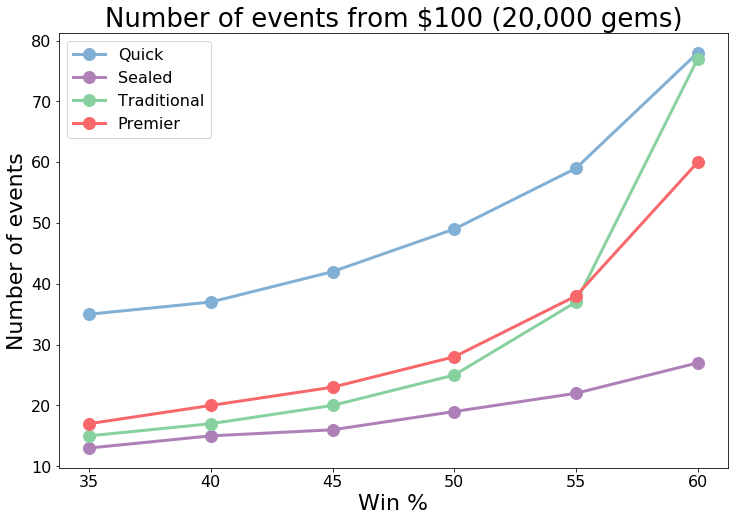

In [218]:
# =============================================================================
# Comparing number of events
# =============================================================================
money = 100
raresPerDraft = 3
winRateList = list(np.array(range(5,76,5))/100)
draftType = 'quick'
quick = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'sealed'
sealed = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'traditional'
traditional = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'premier'
premier = toDataframe(draftType, money, winRateList, raresPerDraft)

###
fig = plt.figure(figsize=(12,8))
fig.add_subplot(111) # of drafts'

plt.plot(quick['win rate'][6:-3], quick['# of drafts'][6:-3], 'o-', color='#82AFD4', linewidth=3.0, markersize=12, label='Quick')
plt.plot(sealed['win rate'][6:-3], sealed['# of drafts'][6:-3], 'o-', color='#AE80B8', linewidth=3.0, markersize=12, label='Sealed')
plt.plot(traditional['win rate'][6:-3], traditional['# of drafts'][6:-3], 'o-', color='#87D1A1', linewidth=3.0, markersize=12, label='Traditional')
plt.plot(premier['win rate'][6:-3], premier['# of drafts'][6:-3], 'o-', color='#F86769', linewidth=3.0, markersize=12, label='Premier')

# plt.plot(quick['win rate'][6:-3], quick['# of drafts'][6:-3], 'o-', color='#8E87BE', linewidth=3.0, markersize=12, label='Quick')
# plt.plot(sealed['win rate'][6:-3], sealed['# of drafts'][6:-3], 'o-', color='#38BBC3', linewidth=3.0, markersize=12, label='Sealed')
# plt.plot(traditional['win rate'][6:-3], traditional['# of drafts'][6:-3], 'o-', color='#D07AA7', linewidth=3.0, markersize=12, label='Traditional')
# plt.plot(premier['win rate'][6:-3], premier['# of drafts'][6:-3], 'o-', color='#3987B8', linewidth=3.0, markersize=12, label='Premier')

# plt.plot(quick['win rate'][6:-3], quick['# of drafts'][6:-3], 'o-', color='#87074A', linewidth=3.0, markersize=12, label='Quick')
# plt.plot(sealed['win rate'][6:-3], sealed['# of drafts'][6:-3], 'o-', color='#550F3B', linewidth=3.0, markersize=12, label='Sealed')
# plt.plot(traditional['win rate'][6:-3], traditional['# of drafts'][6:-3], 'o-', color='#674374', linewidth=3.0, markersize=12, label='Traditional')
# plt.plot(premier['win rate'][6:-3], premier['# of drafts'][6:-3], 'o-', color='#CBA6C3', linewidth=3.0, markersize=12, label='Premier')

# plt.plot(quick['win rate'][6:-3], quick['# of drafts'][6:-3], 'o-', color='#356589', linewidth=3.0, markersize=12, label='Quick')
# plt.plot(sealed['win rate'][6:-3], sealed['# of drafts'][6:-3], 'o-', color='#3987B8', linewidth=3.0, markersize=12, label='Sealed')
# plt.plot(traditional['win rate'][6:-3], traditional['# of drafts'][6:-3], 'o-', color='#8E87BE', linewidth=3.0, markersize=12, label='Traditional')
# plt.plot(premier['win rate'][6:-3], premier['# of drafts'][6:-3], 'o-', color='#7F9CB2', linewidth=3.0, markersize=12, label='Premier')

# plt.plot(quick['win rate'][6:-3], quick['# of drafts'][6:-3], 'o-', color='#947E8D', linewidth=3.0, markersize=12, label='Quick')
# plt.plot(sealed['win rate'][6:-3], sealed['# of drafts'][6:-3], 'o-', color='#FBD1DD', linewidth=3.0, markersize=12, label='Sealed')
# plt.plot(traditional['win rate'][6:-3], traditional['# of drafts'][6:-3], 'o-', color='#27968B', linewidth=3.0, markersize=12, label='Traditional')
# plt.plot(premier['win rate'][6:-3], premier['# of drafts'][6:-3], 'o-', color='#EC8A9C', linewidth=3.0, markersize=12, label='Premier')

plt.xlabel('Win %', fontsize=22)
plt.ylabel('Number of events', fontsize=22)
plt.legend(fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.title('Number of events from $100 (20,000 gems)', fontsize=26)
plt.show();
plt.close()


>## Quick draft clearly beats the other event types. What happens above a 60% win rate?

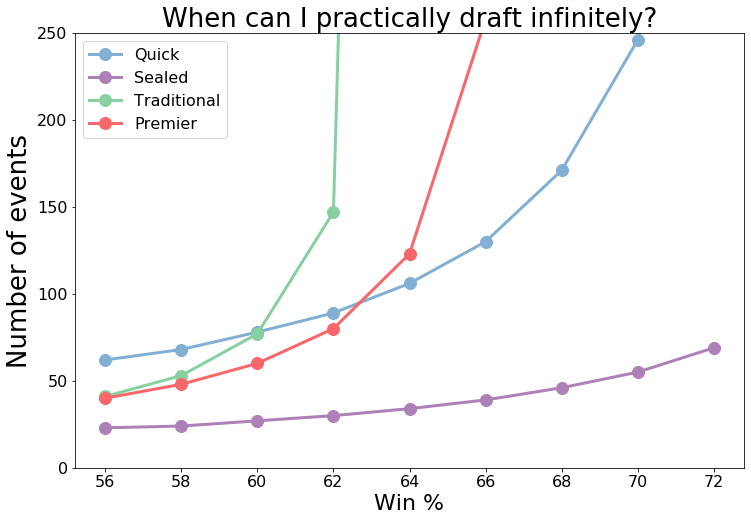

In [219]:
# =============================================================================
# Comparing infinite
# =============================================================================
money = 100
raresPerDraft = 3
winRateList = list(np.array(range(56,76,2))/100)
draftType = 'quick'
quick = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'sealed'
sealed = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'traditional'
traditional = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'premier'
premier = toDataframe(draftType, money, winRateList, raresPerDraft)

fig = plt.figure(figsize=(12,8))
fig.add_subplot(111) # of drafts'
plt.plot(quick['win rate'][:-1], quick['# of drafts'][:-1], 'o-', color='#82AFD4', linewidth=3.0, markersize=12, label='Quick')
plt.plot(sealed['win rate'][:-1], sealed['# of drafts'][:-1], 'o-', color='#AE80B8', linewidth=3.0, markersize=12, label='Sealed')
plt.plot(traditional['win rate'][:-3], traditional['# of drafts'][:-3], 'o-', color='#87D1A1', linewidth=3.0, markersize=12, label='Traditional')
plt.plot(premier['win rate'][:-4], premier['# of drafts'][:-4], 'o-', color='#F86769', linewidth=3.0, markersize=12, label='Premier')
plt.xlabel('Win %', fontsize=22)
plt.ylabel('Number of events', fontsize=26)
plt.legend(fontsize=16)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
#plt.xlim(60, 76)
plt.ylim(0, 250)
plt.title('When can I practically draft infinitely?', fontsize=26)
plt.show()



>## Traditional draft takes off quickly once your win rate inches above 60%. Note that this analysis indirectly tells you how many gems you win relative to the cost of entry (expected value).

# <center> 3. What is the best limited event if you're mainly concerned with growing your collection for constructed </center>

>## One important parameter for this analysis is how many rares/mythics you get on average per draft. Let's first consider the case where you don't rare draft at all. You only take a rare/mythic that's naturally fits your deck. Based on feedback from Reddit users, let's assume that the AVERAGE number is 1.5 rares/mythics per draft.

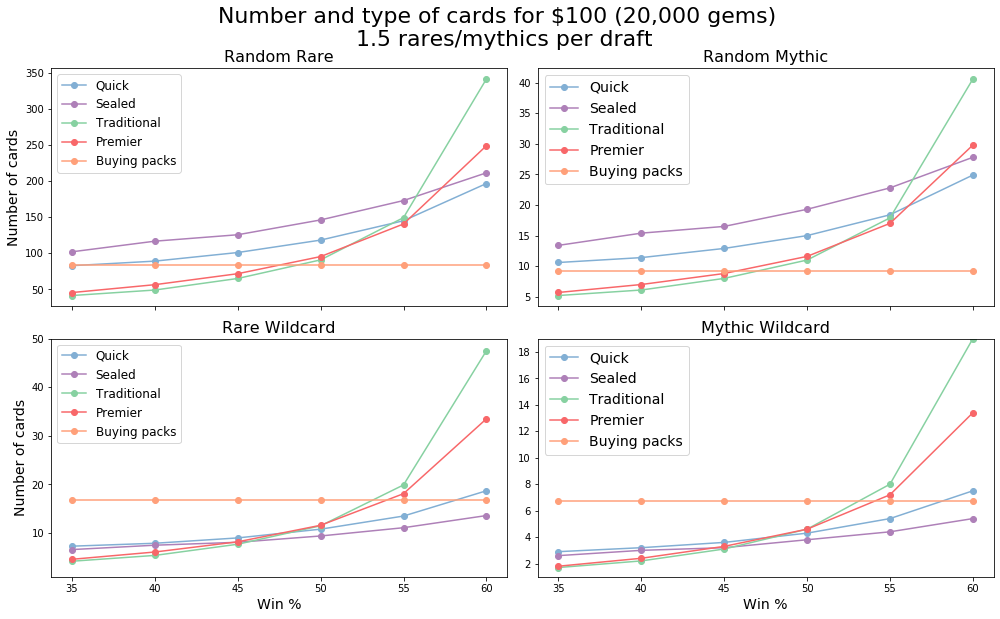

In [220]:
# =============================================================================
# If I’m primary concerned with growing my collection for constructed, what is the best limited event?
# =============================================================================
money = 100
raresPerDraft = 1.5
winRateList = list(np.array(range(5,76,5))/100)
draftType = 'quick'
quick = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'sealed'
sealed = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'traditional'
traditional = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'premier'
premier = toDataframe(draftType, money, winRateList, raresPerDraft)
buyDf = pd.DataFrame([getCards('buying', 100, 0, 0)] * 15, columns=['rareRand', 'mythicRand', 'rareWild', 'mythicWild']) 
buyDf['win rate'] = np.array(winRateList) * 100

plt.close()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,9), sharex=True)
ax1.plot(quick['win rate'][6:-3], quick['rareRand'][6:-3], 'o-', color='#82AFD4', label='Quick')
ax1.plot(sealed['win rate'][6:-3], sealed['rareRand'][6:-3], 'o-', color='#AE80B8', label='Sealed')
ax1.plot(traditional['win rate'][6:-3], traditional['rareRand'][6:-3], 'o-', color='#87D1A1', label='Traditional')
ax1.plot(premier['win rate'][6:-3], premier['rareRand'][6:-3], 'o-', color='#F86769', label='Premier')
ax1.plot(buyDf['win rate'] [6:-3], buyDf['rareRand'][6:-3], 'o-', color='#FFA07A', label='Buying packs')
ax1.set_ylabel('Number of cards', fontsize=14)
ax1.legend(fontsize=12)
ax1.set_title('Random Rare', fontsize=16)
# ax1.axvline(x=50, linewidth=.5, color='k')

ax2.plot(quick['win rate'][6:-3], quick['mythicRand'][6:-3], 'o-', color='#82AFD4', label='Quick')
ax2.plot(sealed['win rate'][6:-3], sealed['mythicRand'][6:-3], 'o-', color='#AE80B8', label='Sealed')
ax2.plot(traditional['win rate'][6:-3], traditional['mythicRand'][6:-3], 'o-', color='#87D1A1', label='Traditional')
ax2.plot(premier['win rate'][6:-3], premier['mythicRand'][6:-3], 'o-', color='#F86769', label='Premier')
ax2.plot(buyDf['win rate'] [6:-3], buyDf['mythicRand'][6:-3], 'o-', color='#FFA07A', label='Buying packs')
ax2.legend(fontsize=14)
ax2.set_title('Random Mythic', fontsize=16)
# ax2.axvline(x=50, linewidth=.5, color='k')

ax3.plot(quick['win rate'][6:-3], quick['rareWild'][6:-3], 'o-', color='#82AFD4', label='Quick')
ax3.plot(sealed['win rate'][6:-3], sealed['rareWild'][6:-3], 'o-', color='#AE80B8', label='Sealed')
ax3.plot(traditional['win rate'][6:-3], traditional['rareWild'][6:-3], 'mo-', color='#87D1A1',label='Traditional')
ax3.plot(premier['win rate'][6:-3], premier['rareWild'][6:-3], 'o-', color='#F86769',label='Premier')
ax3.plot(buyDf['win rate'] [6:-3], buyDf['rareWild'][6:-3], 'o-', color='#FFA07A', label='Buying packs')
ax3.set_ylim(1, 50)
ax3.set_xlabel('Win %', fontsize=14)
ax3.set_ylabel('Number of cards', fontsize=14)
ax3.legend(fontsize=12)
ax3.set_title('Rare Wildcard', fontsize=16)
# ax3.axvline(x=50, linewidth=.5, color='k')

ax4.plot(quick['win rate'][6:-3], quick['mythicWild'][6:-3], 'o-', color='#82AFD4', label='Quick')
ax4.plot(sealed['win rate'][6:-3], sealed['mythicWild'][6:-3], 'o-', color='#AE80B8', label='Sealed')
ax4.plot(traditional['win rate'][6:-3], traditional['mythicWild'][6:-3], 'o-', color='#87D1A1',label='Traditional')
ax4.plot(premier['win rate'][6:-3], premier['mythicWild'][6:-3], 'o-', color='#F86769',label='Premier')
ax4.plot(buyDf['win rate'] [6:-3], buyDf['mythicWild'][6:-3], 'o-', color='#FFA07A', label='Buying packs')
ax4.set_ylim(1, 19)
ax4.set_xlabel('Win %', fontsize=14)
ax4.legend(fontsize=14)
ax4.set_title('Mythic Wildcard', fontsize=16)
# ax4.axvline(x=50, linewidth=.5, color='k')

fig.suptitle('Number and type of cards for $100 (20,000 gems) \n 1.5 rares/mythics per draft', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.93]);


>## At 50% and below, it is clear that Sealed and Quick Draft are preferable to Premier and Tradition. But above 50% it is hard to interpret because Quick Draft and Sealed result in more random rares/mythics, but less wildcards than Premier and Limited.There's also the fact that just using your gems to buy packs results in more rare and mythic wilcards at 50% but less random rare/mythics.

>## To account for this we can decide how many random rare/mythics are worth one wildcard rare/mythic, and then compare. <br>

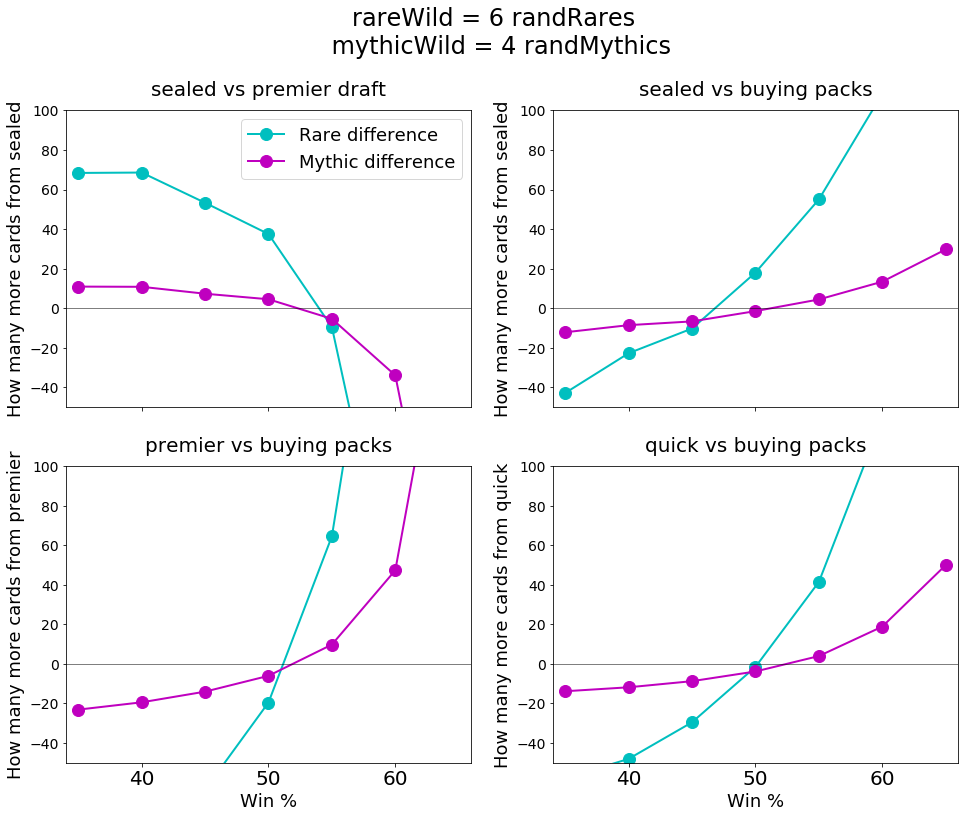

In [221]:
### Sealed vs. Premier
sealed_buy = sealed.copy()
sealed['rareRandDff'] = sealed['rareRand'] - premier['rareRand']
sealed['rareWildDff'] = premier['rareWild'] - sealed['rareWild']
sealed['mythicRandDff'] = sealed['mythicRand'] - premier['mythicRand']
sealed['mythicWildDff'] = premier['mythicWild'] - sealed['mythicWild']
sealed['mythicWildCorr'] = sealed['mythicWildDff'] * 4
sealed['mythicDiff'] = sealed['mythicRandDff'] - sealed['mythicWildCorr']
sealed['rareWildCorr'] = sealed['rareWildDff'] * 6
sealed['rareDiff'] = sealed['rareRandDff'] - sealed['rareWildCorr']
sealed[sealed['win rate'] == 50]

### Sealed vs. Buying
sealed_buy['rareRandDff'] = sealed_buy['rareRand'] - buyDf['rareRand']
sealed_buy['rareWildDff'] = buyDf['rareWild'] - sealed_buy['rareWild']
sealed_buy['mythicRandDff'] = sealed_buy['mythicRand'] - buyDf['mythicRand']
sealed_buy['mythicWildDff'] = buyDf['mythicWild'] - sealed_buy['mythicWild']
sealed_buy['mythicWildCorr'] = sealed_buy['mythicWildDff'] * 4
sealed_buy['mythicDiff'] = sealed_buy['mythicRandDff'] - sealed_buy['mythicWildCorr']
sealed_buy['rareWildCorr'] = sealed_buy['rareWildDff'] * 6
sealed_buy['rareDiff'] = sealed_buy['rareRandDff'] - sealed_buy['rareWildCorr']
sealed_buy[sealed_buy['win rate'] == 50]

### Premier vs. Buying
premier['rareRandDff'] = premier['rareRand'] - buyDf['rareRand']
premier['rareWildDff'] = buyDf['rareWild'] - premier['rareWild']
premier['mythicRandDff'] = premier['mythicRand'] - buyDf['mythicRand']
premier['mythicWildDff'] = buyDf['mythicWild'] - premier['mythicWild']
premier['mythicWildCorr'] = premier['mythicWildDff'] * 4
premier['mythicDiff'] = premier['mythicRandDff'] - premier['mythicWildCorr']
premier['rareWildCorr'] = premier['rareWildDff'] * 6
premier['rareDiff'] = premier['rareRandDff'] - premier['rareWildCorr']
premier[premier['win rate'] == 50]

### Quick vs. Buying
quick['rareRandDff'] = quick['rareRand'] - buyDf['rareRand']
quick['rareWildDff'] = buyDf['rareWild'] - quick['rareWild']
quick['mythicRandDff'] = quick['mythicRand'] - buyDf['mythicRand']
quick['mythicWildDff'] = buyDf['mythicWild'] - quick['mythicWild']
quick['mythicWildCorr'] = quick['mythicWildDff'] * 4
quick['mythicDiff'] = quick['mythicRandDff'] - quick['mythicWildCorr']
quick['rareWildCorr'] = quick['rareWildDff'] * 6
quick['rareDiff'] = quick['rareRandDff'] - quick['rareWildCorr']
quick[quick['win rate'] == 50]

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12), sharex=True)
fig.suptitle('rareWild = 6 randRares \n mythicWild = 4 randMythics', size=24, y=1)

ax1.plot(sealed['win rate'] [6:-2], sealed['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax1.plot(sealed['win rate'] [6:-2], sealed['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
# ax1.set_xlabel('Win %', fontsize=18)
ax1.set_ylabel('How many more cards from sealed', fontsize=18)
ax1.legend(fontsize=18)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', labelsize=14)
ax1.set_xlim(34, 66)
ax1.set_ylim(-50, 100)
ax1.axhline(y=0, linewidth=.5, color='k')
ax1.set_title('sealed vs premier draft', fontsize=20, y=1.03)

ax2.plot(sealed['win rate'] [6:-2], sealed_buy['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax2.plot(sealed['win rate'] [6:-2], sealed_buy['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
# ax2.set_xlabel('Win %', fontsize=18)
ax2.set_ylabel('How many more cards from sealed', fontsize=18)
# ax2.legend(fontsize=18)
ax2.tick_params('x', labelsize=20)
ax2.tick_params('y', labelsize=14)
ax2.set_xlim(34, 66)
ax2.set_ylim(-50, 100)
ax2.axhline(y=0, linewidth=.5, color='k')
ax2.set_title('sealed vs buying packs', fontsize=20, y=1.03)

ax3.plot(sealed['win rate'] [6:-2], premier['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax3.plot(sealed['win rate'] [6:-2], premier['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax3.set_xlabel('Win %', fontsize=18)
ax3.set_ylabel('How many more cards from premier', fontsize=18)
# ax3.legend(fontsize=18)
ax3.tick_params('x', labelsize=20)
ax3.tick_params('y', labelsize=14)
ax3.set_xlim(34, 66)
ax3.set_ylim(-50, 100)
ax3.axhline(y=0, linewidth=.5, color='k')
ax3.set_title('premier vs buying packs', fontsize=20, y=1.03)

ax4.plot(sealed['win rate'] [6:-2], quick['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax4.plot(sealed['win rate'] [6:-2], quick['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax4.set_xlabel('Win %', fontsize=18)
ax4.set_ylabel('How many more cards from quick', fontsize=18)
# ax4.legend(fontsize=18)
ax4.tick_params('x', labelsize=20)
ax4.tick_params('y', labelsize=14)
ax4.set_xlim(34, 66)
ax4.set_ylim(-50, 100)
ax4.axhline(y=0, linewidth=.5, color='k')
ax4.set_title('quick vs buying packs', fontsize=20, y=1.03);

>## Later in the season once you start getting duplicates, wildcards will be more valuable. Let's change the conversion rate so that wildcards are more valuable.

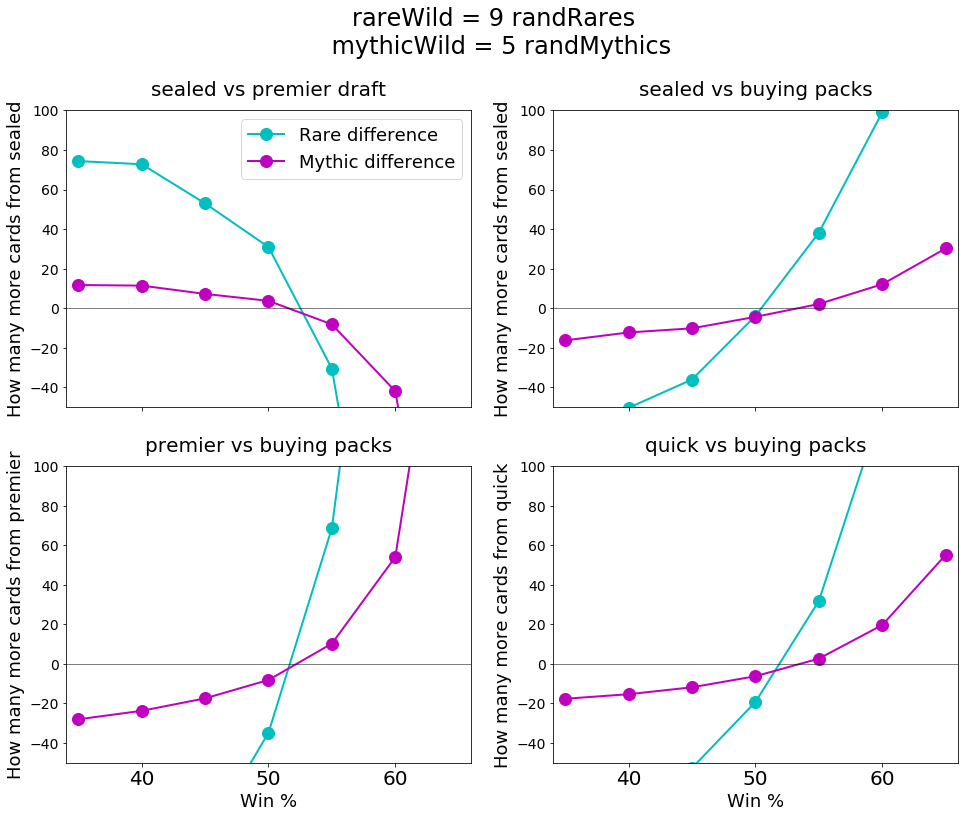

In [222]:
### Sealed vs. Premier
sealed_buy = sealed.copy()
sealed['rareRandDff'] = sealed['rareRand'] - premier['rareRand']
sealed['rareWildDff'] = premier['rareWild'] - sealed['rareWild']
sealed['mythicRandDff'] = sealed['mythicRand'] - premier['mythicRand']
sealed['mythicWildDff'] = premier['mythicWild'] - sealed['mythicWild']
sealed['mythicWildCorr'] = sealed['mythicWildDff'] * 5
sealed['mythicDiff'] = sealed['mythicRandDff'] - sealed['mythicWildCorr']
sealed['rareWildCorr'] = sealed['rareWildDff'] * 9
sealed['rareDiff'] = sealed['rareRandDff'] - sealed['rareWildCorr']
sealed[sealed['win rate'] == 50]

### Sealed vs. Buying
sealed_buy['rareRandDff'] = sealed_buy['rareRand'] - buyDf['rareRand']
sealed_buy['rareWildDff'] = buyDf['rareWild'] - sealed_buy['rareWild']
sealed_buy['mythicRandDff'] = sealed_buy['mythicRand'] - buyDf['mythicRand']
sealed_buy['mythicWildDff'] = buyDf['mythicWild'] - sealed_buy['mythicWild']
sealed_buy['mythicWildCorr'] = sealed_buy['mythicWildDff'] * 5
sealed_buy['mythicDiff'] = sealed_buy['mythicRandDff'] - sealed_buy['mythicWildCorr']
sealed_buy['rareWildCorr'] = sealed_buy['rareWildDff'] * 9
sealed_buy['rareDiff'] = sealed_buy['rareRandDff'] - sealed_buy['rareWildCorr']
sealed_buy[sealed_buy['win rate'] == 50]

### Premier vs. Buying
premier['rareRandDff'] = premier['rareRand'] - buyDf['rareRand']
premier['rareWildDff'] = buyDf['rareWild'] - premier['rareWild']
premier['mythicRandDff'] = premier['mythicRand'] - buyDf['mythicRand']
premier['mythicWildDff'] = buyDf['mythicWild'] - premier['mythicWild']
premier['mythicWildCorr'] = premier['mythicWildDff'] * 5
premier['mythicDiff'] = premier['mythicRandDff'] - premier['mythicWildCorr']
premier['rareWildCorr'] = premier['rareWildDff'] * 9
premier['rareDiff'] = premier['rareRandDff'] - premier['rareWildCorr']
premier[premier['win rate'] == 50]

### Quick vs. Buying
quick['rareRandDff'] = quick['rareRand'] - buyDf['rareRand']
quick['rareWildDff'] = buyDf['rareWild'] - quick['rareWild']
quick['mythicRandDff'] = quick['mythicRand'] - buyDf['mythicRand']
quick['mythicWildDff'] = buyDf['mythicWild'] - quick['mythicWild']
quick['mythicWildCorr'] = quick['mythicWildDff'] * 5
quick['mythicDiff'] = quick['mythicRandDff'] - quick['mythicWildCorr']
quick['rareWildCorr'] = quick['rareWildDff'] * 9
quick['rareDiff'] = quick['rareRandDff'] - quick['rareWildCorr']
quick[quick['win rate'] == 50]

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(16,12), sharex=True)
fig.suptitle('rareWild = 9 randRares \n mythicWild = 5 randMythics', size=24, y=1)

ax1.plot(sealed['win rate'] [6:-2], sealed['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax1.plot(sealed['win rate'] [6:-2], sealed['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
# ax1.set_xlabel('Win %', fontsize=18)
ax1.set_ylabel('How many more cards from sealed', fontsize=18)
ax1.legend(fontsize=18)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', labelsize=14)
ax1.set_xlim(34, 66)
ax1.set_ylim(-50, 100)
ax1.axhline(y=0, linewidth=.5, color='k')
ax1.set_title('sealed vs premier draft', fontsize=20, y=1.03)

ax2.plot(sealed['win rate'] [6:-2], sealed_buy['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax2.plot(sealed['win rate'] [6:-2], sealed_buy['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
# ax2.set_xlabel('Win %', fontsize=18)
ax2.set_ylabel('How many more cards from sealed', fontsize=18)
# ax2.legend(fontsize=18)
ax2.tick_params('x', labelsize=20)
ax2.tick_params('y', labelsize=14)
ax2.set_xlim(34, 66)
ax2.set_ylim(-50, 100)
ax2.axhline(y=0, linewidth=.5, color='k')
ax2.set_title('sealed vs buying packs', fontsize=20, y=1.03)

ax3.plot(sealed['win rate'] [6:-2], premier['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax3.plot(sealed['win rate'] [6:-2], premier['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax3.set_xlabel('Win %', fontsize=18)
ax3.set_ylabel('How many more cards from premier', fontsize=18)
# ax3.legend(fontsize=18)
ax3.tick_params('x', labelsize=20)
ax3.tick_params('y', labelsize=14)
ax3.set_xlim(34, 66)
ax3.set_ylim(-50, 100)
ax3.axhline(y=0, linewidth=.5, color='k')
ax3.set_title('premier vs buying packs', fontsize=20, y=1.03)

ax4.plot(sealed['win rate'] [6:-2], quick['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax4.plot(sealed['win rate'] [6:-2], quick['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax4.set_xlabel('Win %', fontsize=18)
ax4.set_ylabel('How many more cards from quick', fontsize=18)
# ax4.legend(fontsize=18)
ax4.tick_params('x', labelsize=20)
ax4.tick_params('y', labelsize=14)
ax4.set_xlim(34, 66)
ax4.set_ylim(-50, 100)
ax4.axhline(y=0, linewidth=.5, color='k')
ax4.set_title('quick vs buying packs', fontsize=20, y=1.03);

>## Buying packs is surprisingly good at 50% and below.

# <center> 3. Rare drafting </center>

>## Above, we assumed you were trying to build the best deck and getting 1.5 rares/mythics per draft. What happens when we disregard the quality of our draft deck and pick every rare/mythic that we see?

>## There are two main parameters for this analysis:<br>1. How many more rares/mythics you get per draft when rare drafting.<br>2. How much your win rate decreases.<br><br> This is tricky because rares and mythics are more commonly passed in some formats than others. Luckily MTGGoldfish just published these numbers (https://www.mtggoldfish.com/articles/collecting-mtg-arena-ikoria-edition):<br><br>Quick Draft - you see 3.66 Rares and 0.42 Mythics per draft <br>Premier Draft - you see 6.7 Rares and 0.47 Mythics per draft <br>Traditional Draft - you see 7.6 Rares and 0.60 Mythics per draft

<div class="alert alert-block alert-info">
<b>Note:</b> Below, a win rate of 50% is your win rate when not rare drafting (purple line). If rare drafting decreases your win rate by 5%, the blue lines at 50% would be the rewards at 50% - 5% (i.e., 45%).
</div>

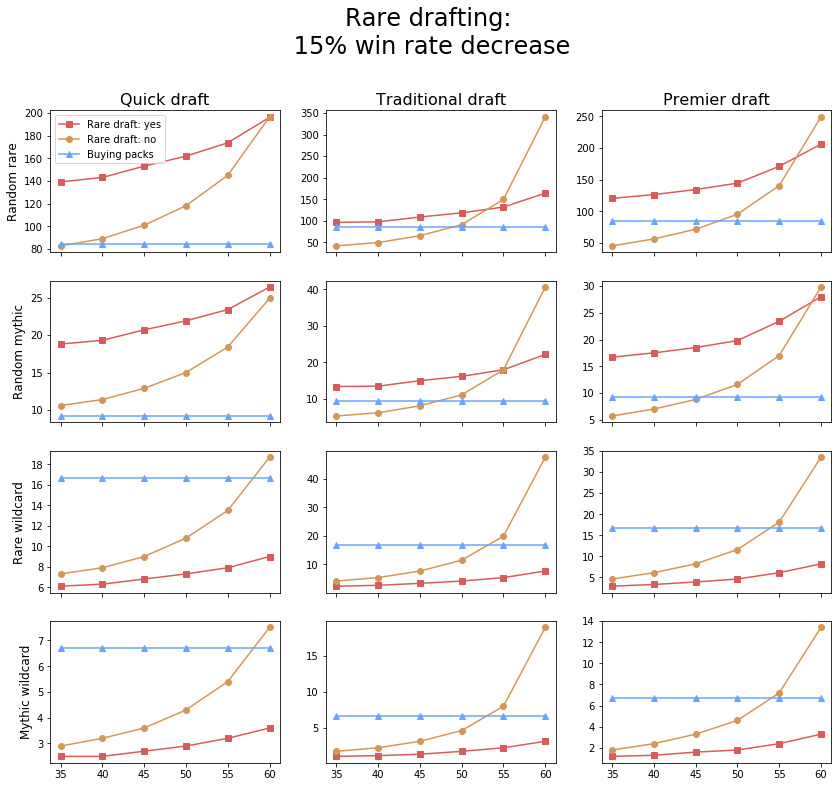

In [223]:
# =============================================================================
# Rare drafting
# =============================================================================
winRateList = list(np.array(range(35,61,5))/100)
buyDf = pd.DataFrame([getCards('buying', 100, 0, 0)] * 6, columns=['rareRand', 'mythicRand', 'rareWild', 'mythicWild']) 
buyDf['win rate'] = np.array(winRateList) * 100

money = 100
raresPerDraft = 1.5
winRateList = list(np.array(range(35,61,5))/100)
draftType = 'quick'
quick = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'traditional'
traditional = toDataframe(draftType, money, winRateList, raresPerDraft)
draftType = 'premier'
premier = toDataframe(draftType, money, winRateList, raresPerDraft)

money = 100
winRateList = list(np.array(range(20,46,5))/100)
raresPerDraft = 3.66 + .42
draftType = 'quick'
quick_rare = toDataframe(draftType, money, winRateList, raresPerDraft)
raresPerDraft = 6.7 + .47
draftType = 'traditional'
traditional_rare = toDataframe(draftType, money, winRateList, raresPerDraft)
raresPerDraft = 7.6 + .60
draftType = 'premier'
premier_rare = toDataframe(draftType, money, winRateList, raresPerDraft)

quick_rare['win rate_lag'] = quick_rare['win rate'] + 15
premier_rare['win rate_lag'] = premier_rare['win rate'] + 15
traditional_rare['win rate_lag'] = traditional_rare['win rate'] + 15

# Plotting
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(14,12), sharex=True)
fig.suptitle('Rare drafting:\n 15% win rate decrease', fontsize=24, y=1);

ax1.plot(quick_rare['win rate_lag'] [:], quick_rare['rareRand'][:], 's-', color='#D95B5B', label='Rare draft: yes')
ax1.plot(quick['win rate'] [:], quick['rareRand'][:], 'o-', color='#D59757',label='Rare draft: no')
ax1.plot(buyDf['win rate'] [:], buyDf['rareRand'][:], '^-', color='#6BA4FF', label='Buying packs')
ax1.legend()
ax1.set_title('Quick draft', fontsize=16)
ax1.set_ylabel('Random rare', fontsize=12)
#ax1.set_ylim(1, 300)
#ax1.axvline(x=50, linewidth=.5, color='k')
ax4.plot(quick_rare['win rate_lag'] [:], quick_rare['mythicRand'][:], 's-', color='#D95B5B', label='Rare draft: yes')
ax4.plot(quick['win rate'] [:], quick['mythicRand'][:], 'o-', color='#D59757',label='Rare draft: no')
ax4.plot(buyDf['win rate'] [:], buyDf['mythicRand'][:], '^-', color='#6BA4FF', label='Buying packs')
ax4.set_ylabel('Random mythic', fontsize=12)
ax7.plot(quick_rare['win rate_lag'] [:], quick_rare['rareWild'][:], 's-', color='#D95B5B', label='Rare draft: yes')
ax7.plot(quick['win rate'] [:], quick['rareWild'][:], 'o-', color='#D59757',label='Rare draft: no')
ax7.plot(buyDf['win rate'] [:], buyDf['rareWild'][:], '^-', color='#6BA4FF', label='Buying packs')
ax7.set_ylabel('Rare wildcard', fontsize=12)
ax10.plot(quick_rare['win rate_lag'] [:], quick_rare['mythicWild'][:], 's-', color='#D95B5B', label='Rare draft: yes')
ax10.plot(quick['win rate'] [:], quick['mythicWild'][:], 'o-', color='#D59757',label='Rare draft: no')
ax10.plot(buyDf['win rate'] [:], buyDf['mythicWild'][:], '^-', color='#6BA4FF', label='Buying packs')
ax10.set_ylabel('Mythic wildcard', fontsize=12)

ax2.plot(traditional_rare['win rate_lag'] , traditional_rare['rareRand'], 's-', color='#D95B5B', label='Rare draft: yes')
ax2.plot(traditional['win rate'] , traditional['rareRand'], 'o-', color='#D59757',label='Rare draft: no')
ax2.plot(buyDf['win rate'] [:], buyDf['rareRand'][:], '^-', color='#6BA4FF', label='Buying packs')
#ax2.legend()
ax2.set_title('Traditional draft', fontsize=16)
#ax1.set_ylim(1, 300)
#ax1.axvline(x=50, linewidth=.5, color='k')
ax5.plot(traditional_rare['win rate_lag'] , traditional_rare['mythicRand'], 's-', color='#D95B5B', label='Rare draft: yes')
ax5.plot(traditional['win rate'] , traditional['mythicRand'], 'o-', color='#D59757',label='Rare draft: no')
ax5.plot(buyDf['win rate'] [:], buyDf['mythicRand'][:], '^-', color='#6BA4FF', label='Buying packs')
ax8.plot(traditional_rare['win rate_lag'], traditional_rare['rareWild'], 's-', color='#D95B5B', label='Rare draft: yes')
ax8.plot(traditional['win rate'] , traditional['rareWild'], 'o-', color='#D59757',label='Rare draft: no')
ax8.plot(buyDf['win rate'] [:], buyDf['rareWild'][:], '^-', color='#6BA4FF', label='Buying packs')
ax11.plot(traditional_rare['win rate_lag'], traditional_rare['mythicWild'], 's-', color='#D95B5B', label='Rare draft: yes')
ax11.plot(traditional['win rate'] , traditional['mythicWild'], 'o-', color='#D59757',label='Rare draft: no')
ax11.plot(buyDf['win rate'] [:], buyDf['mythicWild'][:], '^-', color='#6BA4FF', label='Buying packs')

ax3.plot(premier_rare['win rate_lag'], premier_rare['rareRand'], 's-', color='#D95B5B', label='Rare draft: yes')
ax3.plot(premier['win rate'], premier['rareRand'], 'o-', color='#D59757',label='Rare draft: no')
ax3.plot(buyDf['win rate'] [:], buyDf['rareRand'][:], '^-', color='#6BA4FF', label='Buying packs')
#ax3.legend()
ax3.set_title('Premier draft', fontsize=16)
#ax1.set_ylim(1, 300)
#ax1.axvline(x=50, linewidth=.5, color='k')
ax6.plot(premier_rare['win rate_lag'] , premier_rare['mythicRand'], 's-', color='#D95B5B', label='Rare draft: yes')
ax6.plot(premier['win rate'] , premier['mythicRand'], 'o-', color='#D59757',label='Rare draft: no')
ax6.plot(buyDf['win rate'] [:], buyDf['mythicRand'][:], '^-', color='#6BA4FF', label='Buying packs')
ax9.plot(premier_rare['win rate_lag'] , premier_rare['rareWild'], 's-', color='#D95B5B', label='Rare draft: yes')
ax9.plot(premier['win rate'] , premier['rareWild'], 'o-', color='#D59757',label='Rare draft: no')
ax9.plot(buyDf['win rate'] [:], buyDf['rareWild'][:], '^-', color='#6BA4FF', label='Buying packs')
ax12.plot(premier_rare['win rate_lag'] , premier_rare['mythicWild'], 's-', color='#D95B5B', label='Rare draft: yes')
ax12.plot(premier['win rate'] , premier['mythicWild'], 'o-', color='#D59757',label='Rare draft: no')
ax12.plot(buyDf['win rate'] [:], buyDf['mythicWild'][:], '^-', color='#6BA4FF', label='Buying packs');

<div class="alert alert-block alert-info">
<b>Note:</b> To use this graph correctly, use your win rate when NOT rare drafting; the graph corrects for you.
</div>

>## This is a ridiculous wall of information. Let's reduce it with our conversion method above.

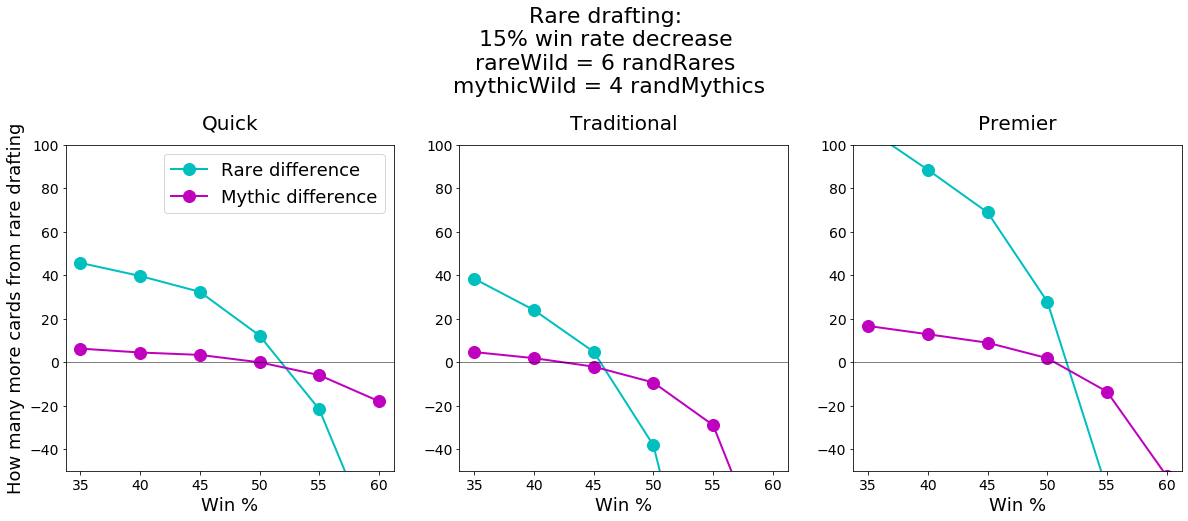

In [224]:
### Quick
quick['rareRandDff'] = quick_rare['rareRand'] - quick['rareRand']
quick['rareWildDff'] = quick['rareWild'] - quick_rare['rareWild']
quick['mythicRandDff'] = quick_rare['mythicRand'] - quick['mythicRand']
quick['mythicWildDff'] = quick['mythicWild'] - quick_rare['mythicWild']
quick['mythicWildCorr'] = quick['mythicWildDff'] * 5
quick['mythicDiff'] = quick['mythicRandDff'] - quick['mythicWildCorr']
quick['rareWildCorr'] = quick['rareWildDff'] * 9
quick['rareDiff'] = quick['rareRandDff'] - quick['rareWildCorr']

### Traditional
traditional['rareRandDff'] = traditional_rare['rareRand'] - traditional['rareRand']
traditional['rareWildDff'] = traditional['rareWild'] - traditional_rare['rareWild']
traditional['mythicRandDff'] = traditional_rare['mythicRand'] - traditional['mythicRand']
traditional['mythicWildDff'] = traditional['mythicWild'] - traditional_rare['mythicWild']
traditional['mythicWildCorr'] = traditional['mythicWildDff'] * 5
traditional['mythicDiff'] = traditional['mythicRandDff'] - traditional['mythicWildCorr']
traditional['rareWildCorr'] = traditional['rareWildDff'] * 9
traditional['rareDiff'] = traditional['rareRandDff'] - traditional['rareWildCorr']

### Premier
premier['rareRandDff'] = quick_rare['rareRand'] - premier['rareRand']
premier['rareWildDff'] = premier['rareWild'] - quick_rare['rareWild']
premier['mythicRandDff'] = quick_rare['mythicRand'] - premier['mythicRand']
premier['mythicWildDff'] = premier['mythicWild'] - quick_rare['mythicWild']
premier['mythicWildCorr'] = premier['mythicWildDff'] * 5
premier['mythicDiff'] = premier['mythicRandDff'] - premier['mythicWildCorr']
premier['rareWildCorr'] = premier['rareWildDff'] * 9
premier['rareDiff'] = premier['rareRandDff'] - premier['rareWildCorr']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), sharey=False)
fig.suptitle('Rare drafting:\n 15% win rate decrease \n rareWild = 6 randRares \n mythicWild = 4 randMythics', fontsize=22, y=1.2)

ax1.plot(quick['win rate'], quick['rareDiff'], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax1.plot(quick['win rate'], quick['mythicDiff'], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax1.set_xlabel('Win %', fontsize=18)
ax1.set_ylabel('How many more cards from rare drafting', fontsize=18)
ax1.legend(fontsize=18)
# ax1.set_xticklabels([35,40,45,50,55,60])
ax1.tick_params('x', labelsize=14)
ax1.tick_params('y', labelsize=14)
# ax1.set_xlim(34, 61)
ax1.set_ylim(-50, 100)
ax1.axhline(y=0, linewidth=.5, color='k')
ax1.set_title('Quick', fontsize=20, y=1.03);

ax2.plot(traditional['win rate'], traditional['rareDiff'], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax2.plot(traditional['win rate'], traditional['mythicDiff'], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax2.set_xlabel('Win %', fontsize=18)
# ax2.set_ylabel('How many more cards from rare drafting', fontsize=18)
# ax2.legend(fontsize=18)
ax2.tick_params('x', labelsize=14)
ax2.tick_params('y', labelsize=14)
# ax2.set_xlim(34, 66)
ax2.set_ylim(-50, 100)
ax2.axhline(y=0, linewidth=.5, color='k')
ax2.set_title('Traditional', fontsize=20, y=1.03)

ax3.plot(premier['win rate'], premier['rareDiff'], 'co-', linewidth=2, markersize=12, label='Rare difference')
ax3.plot(premier['win rate'], premier['mythicDiff'], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
ax3.set_xlabel('Win %', fontsize=18)
# ax3.set_ylabel('How many more cards from rare drafting', fontsize=18)
# ax3.legend(fontsize=18)
ax3.tick_params('x', labelsize=14)
ax3.tick_params('y', labelsize=14)
# ax3.set_xlim(34, 66)
ax3.set_ylim(-50, 100)
ax3.axhline(y=0, linewidth=.5, color='k')
ax3.set_title('Premier', fontsize=20, y=1.03);

# <center> 4. Should I spend my surplus gold directly on buying packs, or get cards indirectly by entering limited events with the marked up gold entry fee? </center>

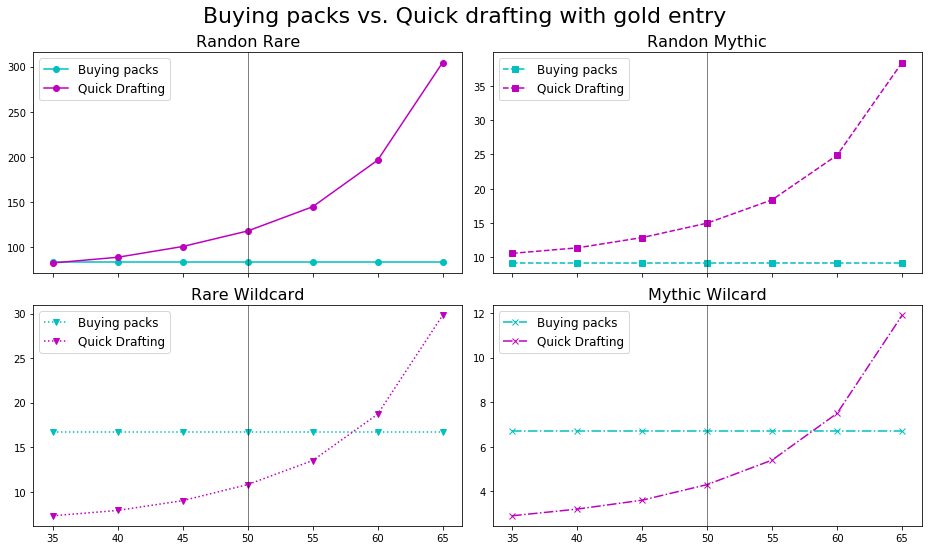

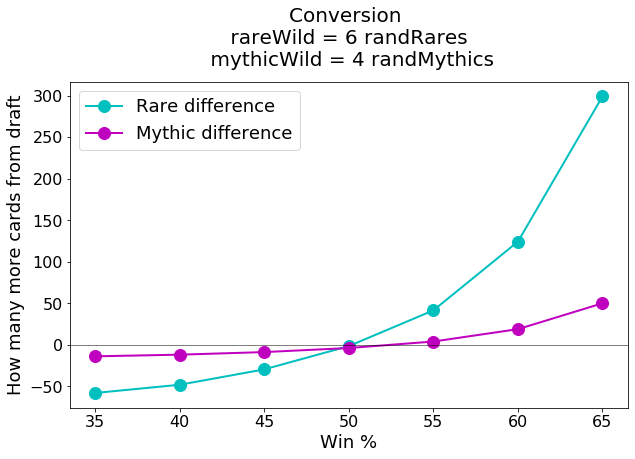

In [225]:
# =============================================================================
# If I’m primarily concerned with growing my collection for constructed, should I (a) spend my surplus gold directly on buying packs, or (b) get cards indirectly by entering limited events with the marked up gold entry fee?
# =============================================================================

money = 100
raresPerDraft = 1.5
winRateList = list(np.array(range(5,76,5))/100)
draftType = 'quick'
unit = 'gold'
goldEntry = True
quickGold = toDataframe(draftType, money, winRateList, raresPerDraft, unit=unit, goldEntry=goldEntry)
buyDf = pd.DataFrame([getCards('buying', 100, 0, 0)] * 15, columns=['rareRand', 'mythicRand', 'rareWild', 'mythicWild']) 
buyDf['win rate'] = np.array(winRateList) * 100

### Separate
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13,8), sharex=True)

ax1.plot(buyDf['win rate'] [6:-2], buyDf['rareRand'][6:-2], 'co-', label='Buying packs')
ax1.plot(quickGold['win rate'] [6:-2], quickGold['rareRand'][6:-2], 'mo-', label='Quick Drafting')
ax1.legend(fontsize=12)
ax1.set_title('Randon Rare', fontsize=16)
ax1.axvline(x=50, linewidth=.5, color='k')
#ax1.grid(b=True, which='major', axis='y')

ax2.plot(buyDf['win rate'] [6:-2], buyDf['mythicRand'][6:-2], 'cs--', label='Buying packs')
ax2.plot(quickGold['win rate'] [6:-2], quickGold['mythicRand'][6:-2], 'ms--', label='Quick Drafting')
ax2.legend(fontsize=12)
ax2.set_title('Randon Mythic', fontsize=16)
ax2.axvline(x=50, linewidth=.5, color='k')
#ax2.grid(b=True, which='major', axis='y')

ax3.plot(buyDf['win rate'] [6:-2], buyDf['rareWild'][6:-2], 'cv:', label='Buying packs')
ax3.plot(quickGold['win rate'] [6:-2], quickGold['rareWild'][6:-2], 'mv:', label='Quick Drafting')
#ax3.set_ylim(1, 50)
ax3.legend(fontsize=12)
ax3.set_title('Rare Wildcard', fontsize=16)
ax3.axvline(x=50, linewidth=.5, color='k')
#ax3.grid(b=True, which='major', axis='y')

ax4.plot(buyDf['win rate'] [6:-2], buyDf['mythicWild'][6:-2], 'cx-.', label='Buying packs')
ax4.plot(quickGold['win rate'] [6:-2], quickGold['mythicWild'][6:-2], 'mx-.', label='Quick Drafting')
ax4.legend(fontsize=12)
ax4.set_title('Mythic Wilcard', fontsize=16)
ax4.axvline(x=50, linewidth=.5, color='k')
#ax4.grid(b=True, which='major', axis='y')

fig.suptitle('Buying packs vs. Quick drafting with gold entry', fontsize=22)
fig.tight_layout(rect=[0, 0.03, 1, 0.95]);

### Intrepretting
quickGold['rareRandDff'] = quickGold['rareRand'] - buyDf['rareRand']
quickGold['rareWildDff'] = buyDf['rareWild'] - quickGold['rareWild']
quickGold['mythicRandDff'] = quickGold['mythicRand'] - buyDf['mythicRand']
quickGold['mythicWildDff'] = buyDf['mythicWild'] - quickGold['mythicWild']
quickGold['mythicWildCorr'] = quickGold['mythicWildDff'] * 4
quickGold['mythicDiff'] = quickGold['mythicRandDff'] - quickGold['mythicWildCorr']
quickGold['rareWildCorr'] = quickGold['rareWildDff'] * 6
quickGold['rareDiff'] = quickGold['rareRandDff'] - quickGold['rareWildCorr']
quickGold[quickGold['win rate'] == 50]

fig = plt.figure(figsize=(10,6))
fig.add_subplot(111) # of drafts'
plt.plot(quickGold['win rate'] [6:-2], quickGold['rareDiff'][6:-2], 'co-', linewidth=2, markersize=12, label='Rare difference')
plt.plot(quickGold['win rate'] [6:-2], quickGold['mythicDiff'][6:-2], 'mo-', linewidth=2, markersize=12, label='Mythic difference')
plt.xlabel('Win %', fontsize=18)
plt.ylabel('How many more cards from draft', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
#plt.xlim(60, 76)
# plt.ylim(-25, 200)
plt.axhline(y=0, linewidth=.5, color='k')
plt.title('Conversion \n rareWild = 6 randRares \n mythicWild = 4 randMythics', fontsize=20, y=1.03)
plt.show();



# <center> Thanks for reading. Please provide suggestions and corrections. </center>

<img src="Images/Merchant_v1.jpg" width="750" height="750" align="center"/>